This is essentially the new and updated implementation with non-ranked technical features.

#### Experiment

1. DataRank

2. Feature Binaries

#### Conclusion

The settings for Sector 20 should make it into the new implementation for next Month.

Sector 35 seems to be volatile but profitable.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy').iloc[-20:]

,RunName,RunDate,Completed,Description
28,run_0108,2018-07-17,True,"Sector 25, non-ranked vars"
29,run_0112,2018-07-17,True,"Sector 20, feature importance test"
30,run_0113,2018-07-17,True,"Sector 25, feature importance test"
31,run_0114,2018-07-17,False,"Sector 45, feature importance test"
32,run_0119,2018-07-19,False,"Sector 20, v5, new sort vars"
33,run_0120,2018-07-19,False,"Sector 25, v5, new sort vars"
34,run_0121,2018-07-19,False,"Sector 35, v5, new sort vars"
35,run_0122,2018-07-19,False,"Sector 45, v5, new sort vars"
36,run_0124,2018-07-23,True,"Sector 20, v5 update"
37,run_0125,2018-07-24,True,"Sector 25, v5 update"


In [3]:
run0 = RunManager('StatArbStrategy', 'run_0124')
run1 = RunManager('StatArbStrategy', 'run_0125')
run2 = RunManager('StatArbStrategy', 'run_0126')
run3 = RunManager('StatArbStrategy', 'run_0127')

In [4]:
run0.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,1.087209,0.091378,-999.0
1,data_rank_flag,True,144,0.991409,0.083967,-999.0
2,drop_binaries,False,144,1.062105,0.089879,-999.0
3,drop_binaries,True,144,1.016513,0.085467,-999.0
4,holding_period,3,96,1.077444,0.087825,-999.0
5,holding_period,5,96,1.042513,0.088258,-999.0
6,holding_period,7,96,0.997969,0.086936,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,1.039309,0.087673,-999.0
8,per_side_count,10,144,1.181238,0.087882,-999.0
9,per_side_count,20,144,0.897380,0.087464,-999.0


In [5]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.598707,0.048339,-999.0
1,data_rank_flag,True,144,0.572930,0.046131,-999.0
2,drop_binaries,False,144,0.572858,0.045966,-999.0
3,drop_binaries,True,144,0.598780,0.048504,-999.0
4,holding_period,3,96,0.653166,0.050850,-999.0
5,holding_period,5,96,0.585292,0.047340,-999.0
6,holding_period,7,96,0.518999,0.043515,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.585819,0.047235,-999.0
8,per_side_count,10,144,0.603332,0.042947,-999.0
9,per_side_count,20,144,0.568305,0.051523,-999.0


In [6]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.931001,0.058539,-999.0
1,data_rank_flag,True,144,0.884958,0.056473,-999.0
2,drop_binaries,False,144,0.900390,0.057348,-999.0
3,drop_binaries,True,144,0.915568,0.057664,-999.0
4,holding_period,3,96,0.913258,0.055523,-999.0
5,holding_period,5,96,0.919323,0.058359,-999.0
6,holding_period,7,96,0.891357,0.058636,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.907979,0.057506,-999.0
8,per_side_count,10,144,0.948215,0.051113,-999.0
9,per_side_count,20,144,0.867744,0.063899,-999.0


In [7]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.437243,0.038948,-999.0
1,data_rank_flag,True,144,0.542453,0.049111,-999.0
2,drop_binaries,False,144,0.501813,0.045203,-999.0
3,drop_binaries,True,144,0.477883,0.042856,-999.0
4,holding_period,3,96,0.641616,0.055779,-999.0
5,holding_period,5,96,0.455610,0.041417,-999.0
6,holding_period,7,96,0.372317,0.034892,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.489848,0.044030,-999.0
8,per_side_count,10,144,0.521130,0.040479,-999.0
9,per_side_count,20,144,0.458566,0.047580,-999.0


# Sector 20 V4 versus V5

Really the important difference to consider is ***data_rank_flag***

In [8]:
drop_params = [('per_side_count', 20), ('per_side_count', 5), ('score_var', 'prma_20'), ('model', "{u'type': u'reg'}")]
run0 = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params)

drop_params = [('per_side_count', 20), ('data_rank_flag', True)]
run1 = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params)

In [9]:
run0.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,48,1.080249,0.075861,-999.0
1,holding_period,5,48,1.063776,0.078084,-999.0
2,holding_period,7,48,1.021368,0.077543,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,1.055131,0.077162,-999.0
4,per_side_count,10,144,1.055131,0.077162,-999.0
5,response_days,10,72,1.050628,0.076311,-999.0
6,response_days,5,72,1.059634,0.078014,-999.0
7,response_type,Simple,144,1.055131,0.077162,-999.0
8,score_var,boll2_40,12,0.929497,0.092234,-999.0
9,score_var,boll4_160,12,1.052386,0.091533,-999.0


In [10]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,72,1.224033,0.090029,-999.0
1,drop_binaries,False,36,1.259481,0.092599,-999.0
2,drop_binaries,True,36,1.188584,0.087459,-999.0
3,holding_period,3,24,1.259888,0.089181,-999.0
4,holding_period,5,24,1.227838,0.090674,-999.0
5,holding_period,7,24,1.184372,0.090231,-999.0
6,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",72,1.224033,0.090029,-999.0
7,per_side_count,10,72,1.224033,0.090029,-999.0
8,response_days,5,72,1.224033,0.090029,-999.0
9,response_type,Simple,72,1.224033,0.090029,-999.0


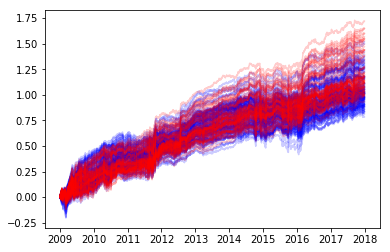

In [11]:
plt.figure()
plt.plot(run0.returns.dropna().cumsum(), 'b', alpha=0.2)
plt.plot(run1.returns.dropna().cumsum(), 'r', alpha=0.2)
plt.show()

In [12]:
comb0 = CombinationSearch()
comb0.set_selection_criteria('sharpe')
comb0.params['training_epochs'] = 5
comb0.add_run(run0)
comb0.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:55<00:00, 11.10s/it]


In [13]:
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 5
comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:52<00:00, 10.50s/it]


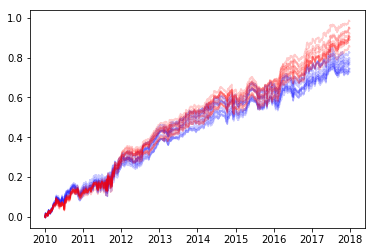

In [14]:
plt.figure()
plt.plot(comb0.best_results_returns.dropna().cumsum(), 'b', alpha=0.2)
plt.plot(comb1.best_results_returns.dropna().cumsum(), 'r', alpha=0.2)
plt.show()

In [15]:
df0 = rollup_returns(comb0.best_results_returns)
df0['yr'] = df0.sum(axis=1)
df0

Qtr,1,2,3,4,yr
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.066527,0.009403,0.080174,-0.024473,0.131632
2011,0.026575,0.025497,0.000017,0.096535,0.148624
2012,0.004253,-0.004914,0.044470,0.076465,0.120273
2013,-0.017829,0.038657,0.036575,0.015712,0.073115
2014,0.035435,0.016292,-0.023669,0.028986,0.057045
2015,-0.001960,0.057712,-0.034656,0.035053,0.056149
2016,0.049729,-0.005346,0.009931,0.037251,0.091564
2017,0.028568,0.068652,-0.028620,0.018234,0.086834


In [16]:
df1 = rollup_returns(comb1.best_results_returns)
df1['yr'] = df1.sum(axis=1)
df1

Qtr,1,2,3,4,yr
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.062166,-0.014243,0.084780,-0.009559,0.123144
2011,0.030526,0.025341,-0.020568,0.126864,0.162163
2012,0.036720,0.007757,0.035817,0.065150,0.145444
2013,-0.000294,0.026317,0.040175,0.025384,0.091583
2014,0.036498,0.037143,0.011227,-0.002724,0.082144
2015,0.000150,0.051145,-0.016435,0.043630,0.078490
2016,0.073242,0.018575,-0.021952,0.066917,0.136783
2017,0.020586,0.064824,0.003443,0.036476,0.125330


# Sector 35 exploration

In [17]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 5
comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:56<00:00, 11.35s/it]


In [18]:
scores = ScoreVariables()
scores.add_run(run2)
scores.start()

  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


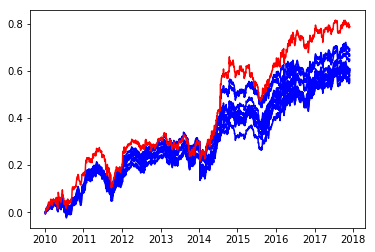

In [19]:
plt.figure()
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'b')
plt.plot(scores.best_results_returns.dropna().cumsum(), 'r')
plt.show()